In [8]:
import pandas as pd
import plotly.graph_objects as go

In [21]:
df = pd.read_csv("data.csv", sep = ';', usecols = ['municipio', 'nomeEstacao', 'latitude', 'datahora'])
df1 = df.replace({',':'.'}, regex = True)
df1['datahora'] = df1['datahora'].astype(float, errors = 'raise')
df2 = df1.groupby(['municipio', 'nomeEstacao', 'latitude']).agg({'datahora':'sum'}).reset_index()

In [39]:
fig = go.Figure(go.Densitymapbox(lat=df2.latitude, 
                                 lon=df2.nomeEstacao,
                                 z=df2.datahora,
                                 radius=40,
                                 colorscale=[[0.0, 'blue',],[0.3,'lime'],[0.5,'yellow'],[0.7,'orange'],[1.0, 'red']],# custome colorscale
                                 zmin=0,
                                 zmax=7000
                                ))


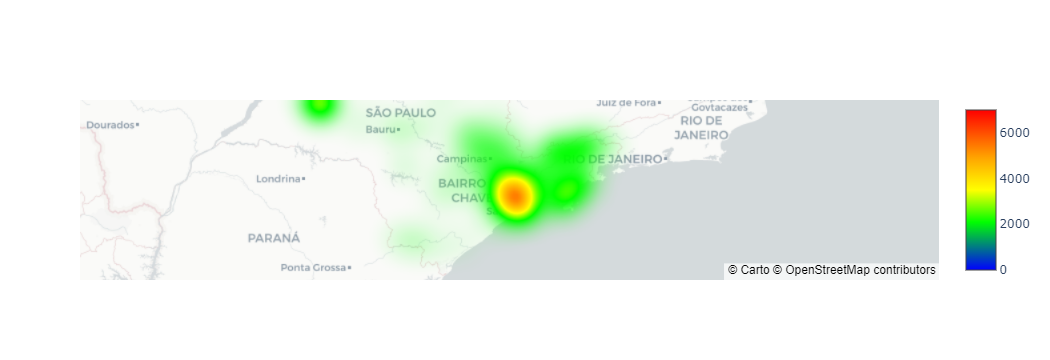

In [40]:
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_center_lon=-46.635,
                  mapbox_center_lat=-23.547,
                  mapbox_zoom=5)

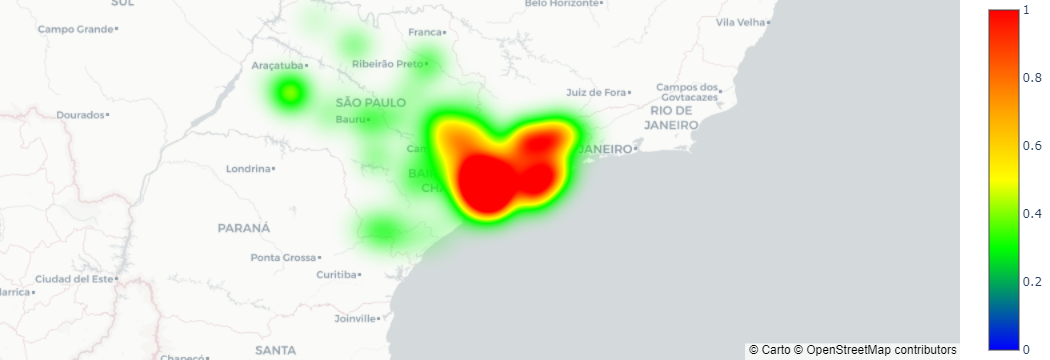

In [36]:
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()